In [1]:
import pandas as pd
df = pd.read_csv('data/redditGeneralSelection.csv')

In [2]:
import numpy as np
#import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import csv

In [4]:
#Detect average sentiment per domain
unique = np.unique(df["Domain"])
print(unique)

with open('data/domains.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)
    writer.writerow( ('Domain', 'Size', 'AverageSentiment') )
    for domain in unique:
        print("Domain:", domain)
        if "[http" not in domain:
            selection = df[df["Domain"].str.contains(domain)]
            indices = []
            values = []
            if len(selection) > 200:
                for index, row in selection.iterrows():
                    value = analyzer.polarity_scores(row["Title"])["compound"]
                    values.append(value)
                    indices.append(index)
                writer.writerow( (domain, len(values), np.mean(values)) )
                print (domain, len(values), np.mean(values))

['02varvara.wordpress.com' '0mac.com' '1.bp.blogspot.com' ..., 'zwire.com'
 'zyalt.livejournal.com' 'zythophile.wordpress.com']
Domain: 02varvara.wordpress.com
Domain: 0mac.com
Domain: 1.bp.blogspot.com
Domain: 1.usa.gov
Domain: 1000memories.com
Domain: 100abdominalexercises.com
Domain: 100r.org
Domain: 101greatgoals.com
Domain: 10news.com
Domain: 10news.dk
Domain: 10tv.com
Domain: 11alive.com
Domain: 11logic.wordpress.com
Domain: 12entry.com
Domain: 12newsnow.com
Domain: 1360sports.com
Domain: 13abc.com
Domain: 13above.com
Domain: 13wham.com
Domain: 143cars.com
Domain: 14juillet.paris.fr
Domain: 14news.com
Domain: 15min.lt
Domain: 1888pressrelease.com
Domain: 1strank.in
Domain: 1sun4all.com
Domain: 1ta.blogfa.com
Domain: 1tvnews.af
Domain: 1up.com
Domain: 1viral.co
Domain: 2008beijingolimpics.com
Domain: 2009hopes.com
Domain: 2012indyinfo.com
Domain: 205.186.133.84
Domain: 209.85.135.104
Domain: 209.85.229.132
Domain: 20min.ch
Domain: 20minutos.tv
Domain: 212.77.1.245
Domain: 213.251.

In [13]:
#Select topic and compare average sentiment with general average sentiment for each domain
topic = "refugee"
domains = pd.read_csv('data/domains.csv')
mostPositive = ""
mostNegative = ""
mostPositiveValue = -1
mostNegativeValue = 1
for domain in domains["Domain"]:
    selection = df[df["Domain"].str.contains(domain)]
    selection = selection[selection["Title"].str.contains(topic)]

    indices = []
    values = []
    if len(selection) > 10:
        for index, row in selection.iterrows():
            value = analyzer.polarity_scores(row["Title"])["compound"]
            values.append(value)
            indices.append(index)
        value = domains[domains["Domain"]==domain]["AverageSentiment"]
        bias = np.mean(values) - float(value)
        if bias > mostPositiveValue:
            mostPositiveValue = bias
            mostPositive = domain
        if bias < mostNegativeValue:
            mostNegativeValue = bias
            mostNegative = domain
        #print (value)
        print( domain, len(values), bias)
selection = df[df["Domain"].str.contains(mostPositive)]
selection = selection[selection["Title"].str.contains(topic)]
print ("################### Most positive: "+ mostPositive + " (average: "+ str(mostPositiveValue) +", n = "+str(len(selection))+")")
for index, row in selection.iterrows():
    value = analyzer.polarity_scores(row["Title"])["compound"]
    print(str(value) + ": " + row["Title"])
selection = df[df["Domain"].str.contains(mostNegative)]
selection = selection[selection["Title"].str.contains(topic)]
print ("################### Most negative: "+ mostNegative + " (average: "+ str(mostNegativeValue) +", n = "+str(len(selection))+")")
for index, row in selection.iterrows():
    value = analyzer.polarity_scores(row["Title"])["compound"]
    print(str(value) + ": " + row["Title"])

abc.net.au 14 0.0203098477567
aljazeera.com 41 0.0821830155059
bbc.co.uk 34 -0.0265371322284
bbc.com 36 -0.0331116154671
cbc.ca 23 -0.078248407643
cnn.com 27 -0.0537540124013
dailymail.co.uk 16 0.019137156314
dw.com 69 -0.0595515050169
france24.com 14 0.164841509434
globalpost.com 13 -0.046744490358
guardian.co.uk 25 -0.160745511263
haaretz.com 11 0.1364502072
independent.co.uk 108 -0.0613196638925
jpost.com 12 -0.109308443709
mail.com 11 0.282006795437
news.com 62 0.0196345589897
news.yahoo.com 41 0.0197100005181
nytimes.com 18 -0.102305830834
reut.rs 95 0.0568951389902
reuters.com 93 0.0531617476745
rt.com 34 0.00369322401229
smh.com.au 11 0.0206788428385
t.co 228 -0.0562230633414
telegraph.co.uk 11 -0.046682463554
theguardian.com 106 -0.0302766014361
thelocal.de 33 0.00537489177473
timesofisrael.com 12 0.332160872395
washingtonpost.com 31 0.00216909096361
yahoo.com 46 0.011234173086
################### Most positive: timesofisrael.com (average: 0.332160872395, n = 12)
0.0: ‘Israel t

/home/constantin/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/constantin/.local/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


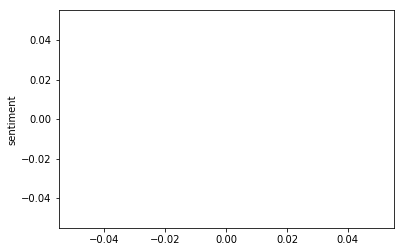

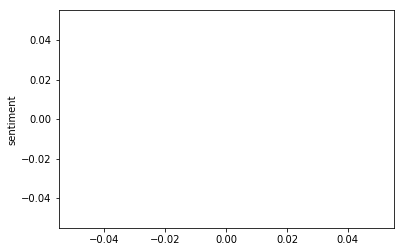

In [86]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
lowess = sm.nonparametric.lowess(values, indices, frac=0.1)
plt.plot(lowess[:, 0], lowess[:, 1])
plt.ylabel('sentiment')
plt.show()

plt.plot(indices, values)
plt.ylabel('sentiment')
plt.show()